In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/unemployment data/Unemployment in India.csv')
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
# Drop ' Frequency' since it's always the same
df = df.drop(columns=[col for col in df.columns if 'Frequency' in col])


# Optional: Rename long columns for convenience
df = df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
})


In [5]:
print(df.columns.tolist())


['Region', ' Date', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area']


In [6]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()
print(df.columns.tolist())

# Drop 'Frequency' if it's still there (optional, just in case)
if 'Frequency' in df.columns:
    df = df.drop(columns=['Frequency'])

# Rename columns
df = df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
})



['Region', 'Date', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area']


In [11]:

if 'Frequency' in df.columns:
    df = df.drop(columns=['Frequency'])

# Clean up column names (strip hidden spaces)
df.columns = df.columns.str.strip()

# Rename long columns to simpler ones
df = df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
})

# Ensure 'Date' is a clean string with no hidden spaces
df['Date'] = df['Date'].astype(str).str.strip()

# Finally convert to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


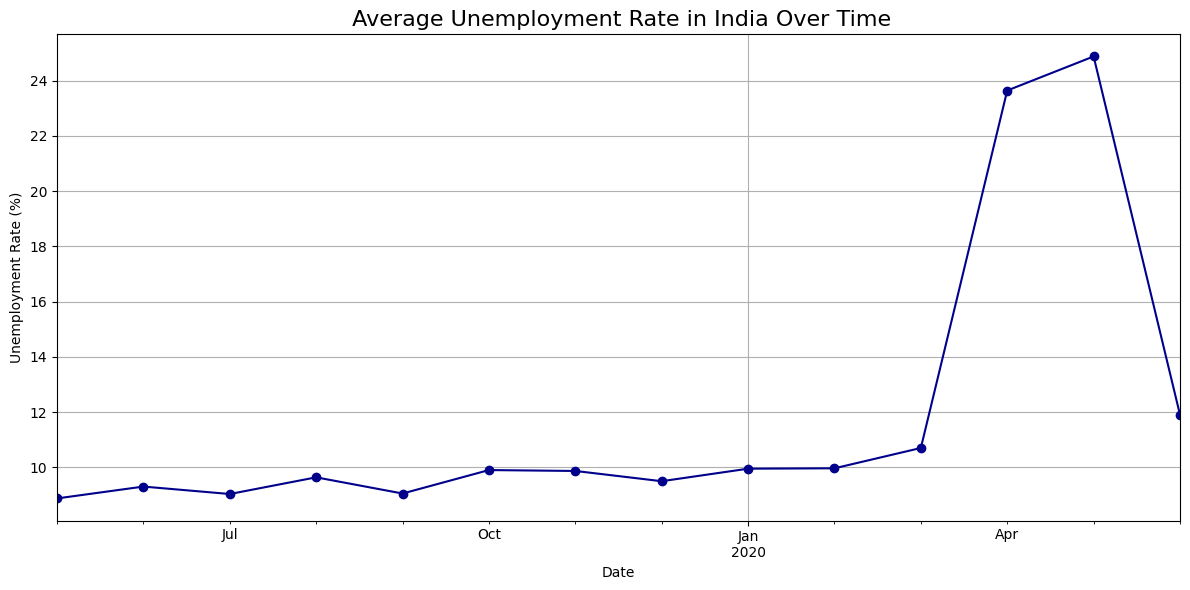

In [12]:
monthly_avg = df.groupby('Date')['Unemployment_Rate'].mean()

plt.figure(figsize=(12,6))
monthly_avg.plot(marker='o', linestyle='-', color='darkblue')
plt.title(" Average Unemployment Rate in India Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-13-727616464.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.values, y=state_avg.index, palette='coolwarm')
/tmp/ipython-input-13-727616464.py:10: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


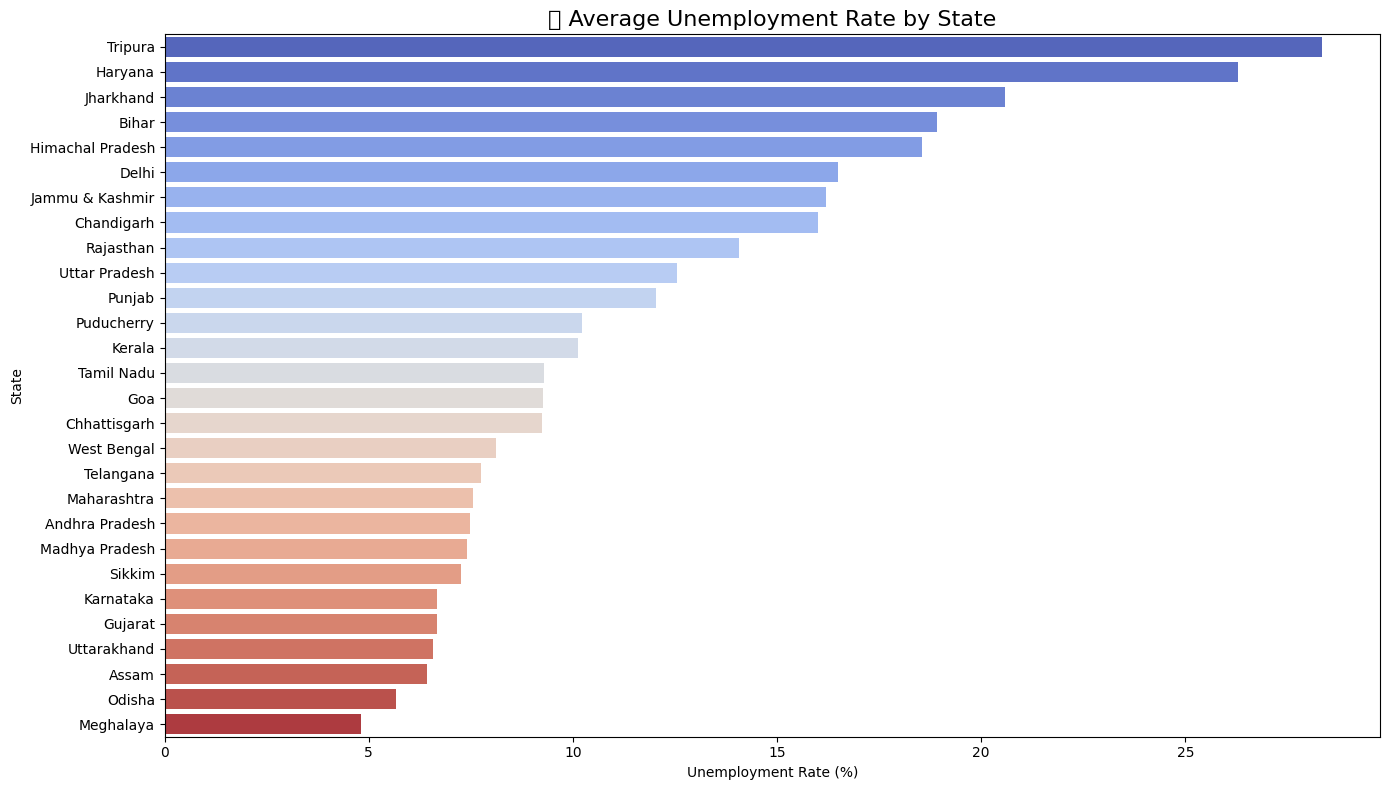

In [13]:
# Group by state and calculate the average unemployment rate for each
state_avg = df.groupby('Region')['Unemployment_Rate'].mean().sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(x=state_avg.values, y=state_avg.index, palette='coolwarm')
plt.title("🏙️ Average Unemployment Rate by State", fontsize=16)
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("State")
plt.tight_layout()
plt.show()
